<a href="https://colab.research.google.com/github/riobudianto5311422129/kumpulan-tugas-job-sheet/blob/main/RIOBUDIANTO_5311422129_job%20sheet%202%20(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#merupakan library dan hal hal yang di butuhkan dalam membaca dan mengeolah data

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [7]:
df = pd.read_csv('/car_purchasing.csv', encoding='ISO-8859-1')
#sebuah fungsi dari library pandas yang dapat membaca file csv (contohnya adalah file /car_purchasing.csv)
df.head()
#sebuah code yang dapat menampilkan beberapa baris pertama dari DataFrame car purchasing

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [8]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)
df.head()
# df.drop adalah sebuah code untuk menghapus colom, hal ini dapat di gunakan karena beberapa colom yang ada di sumber data
#penghapusan ini di gunakan karena tidak semua colom data di gunakan sebagai input data ANN

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [9]:
df.info()
#kode kode ini di gunakan untuk mengetahui data-data dan informasi dari struktur dan tipe data di atas
df.isna().sum()
#kode kode ini di gunakan untuk mengetahui data-data dan informasi colom yang hilang dari data sheet

#jadi kedua kode ini untuk memastikan kesiapan data untuk di olah dan juga sebagai code untuk megetahui kelengkapan colom pada data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

Text(0.5, 1.0, 'the corr between credit card debt and annual Salary')

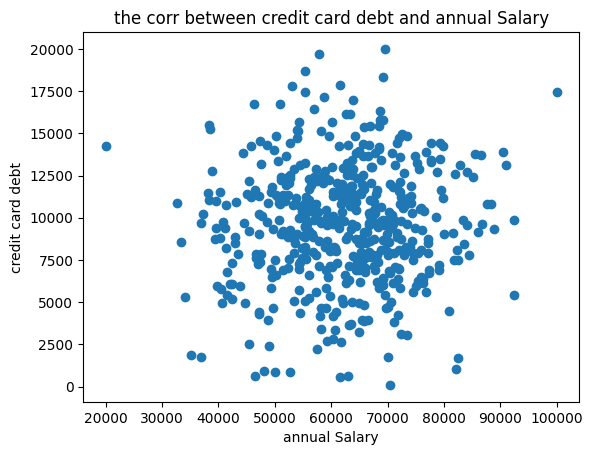

In [10]:
plt.scatter(df['annual Salary'] , df['credit card debt'])
# code untuk membuat scatter plot, dimana scatter plot adalah membuat perbandingan dan hubungan dari 2 variable atau lebih, dimana di sini
# antara colom annual Salary dan colom credit card debt
plt.xlabel('annual Salary')
# dimana nilai annual salary sebagai sumbu x
plt.ylabel('credit card debt')
# dimana nilai credit card debt sebagai sumbu y
plt.title('the corr between credit card debt and annual Salary')
# dimana ini digunakan sebagai judul scatter plot

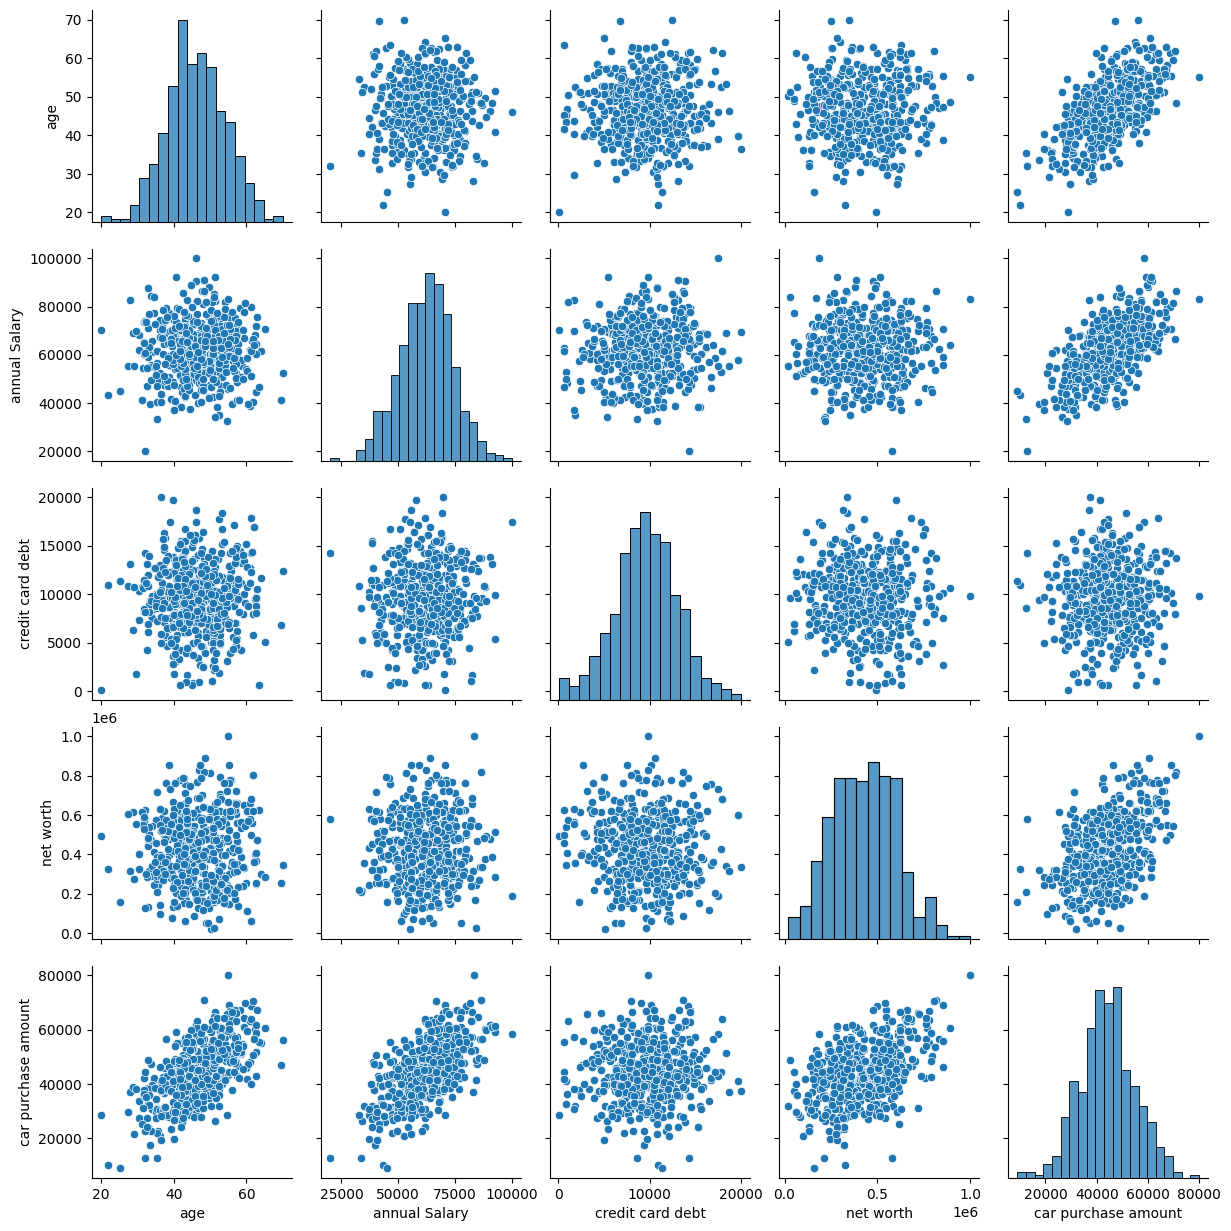

In [12]:
sns.pairplot(df)
#kode untuk membuat kolerasi setiap kolom yang ada di data, berbentuk visual, di mana sumbu x dan y nya di jelaskan pada table

In [22]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
# ini adalah code untuk meyimpan variable di sumbu x dan y, sehingga table akan lebih mudah di baca
# X = df.iloc[:, :-1] mengindikasikan variable yang di masukan adalah semua baris dan semua colom kecuali kolom terakhir (ada:-1)
# y = df.iloc[:, :-1] mengindikasikan variable yang di masukan adalah semua baris dan semua colom kecuali kolom terakhir (ada:-1)
# Jadi, setelah menjalankan kedua perintah ini, X akan berisi fitur-fitur yang akan digunakan untuk melakukan prediksi, dan y akan berisi nilai target yang akan diprediksi.

In [25]:
lreg = LinearRegression()
#Ini menginisialisasi model regresi linear menggunakan kelas LinearRegression dari scikit-learn.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#melakukan defenisi
lreg.fit(X_train, y_train)
#Ini melatih model regresi linear menggunakan data latih (X_train) dan nilai target yang sesuai (y_train).
#Model akan belajar untuk mempelajari hubungan antara fitur-fitur dalam X_train dan nilai target dalam y_train.
print('Train score', lreg.score(X_train, y_train))
#menampilkan skor R-squared
print('Test score', lreg.score(X_test, y_test))
# Ini mencetak skor R-squared dari model pada data uji

Train score 0.9999999812450086
Test score 0.9999999808303804


In [26]:
y_pred = lreg.predict(X_test)
#untuk melakukan prediksi terhadap data uji (X_test). Ini adalah langkah yang tepat dalam evaluasi model regresi linear.

In [27]:
ann = Sequential([Dense(32, activation="relu"),
                 Dense(1, activation='linear')])

ann.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])


history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)
#ini adalah code untuk memulai ANN, jadi dari tadi itu kita mempersiapkan data untuk memulai ANN

Epoch 1/50
10/10 [==============================] - 3s 67ms/step - loss: 43637559296.0000 - mean_absolute_error: 198087.5938 - val_loss: 34825609216.0000 - val_mean_absolute_error: 176967.0000
Epoch 2/50
10/10 [==============================] - 0s 16ms/step - loss: 29489496064.0000 - mean_absolute_error: 163317.7969 - val_loss: 22638100480.0000 - val_mean_absolute_error: 143287.8750
Epoch 3/50
10/10 [==============================] - 0s 11ms/step - loss: 18824128512.0000 - mean_absolute_error: 130697.5234 - val_loss: 13630474240.0000 - val_mean_absolute_error: 111793.0781
Epoch 4/50
10/10 [==============================] - 0s 33ms/step - loss: 11034707968.0000 - mean_absolute_error: 100608.9844 - val_loss: 7582956544.0000 - val_mean_absolute_error: 83948.1484
Epoch 5/50
10/10 [==============================] - 0s 29ms/step - loss: 5973402624.0000 - mean_absolute_error: 74376.7500 - val_loss: 3851898368.0000 - val_mean_absolute_error: 60278.4258
Epoch 6/50
10/10 [=======================

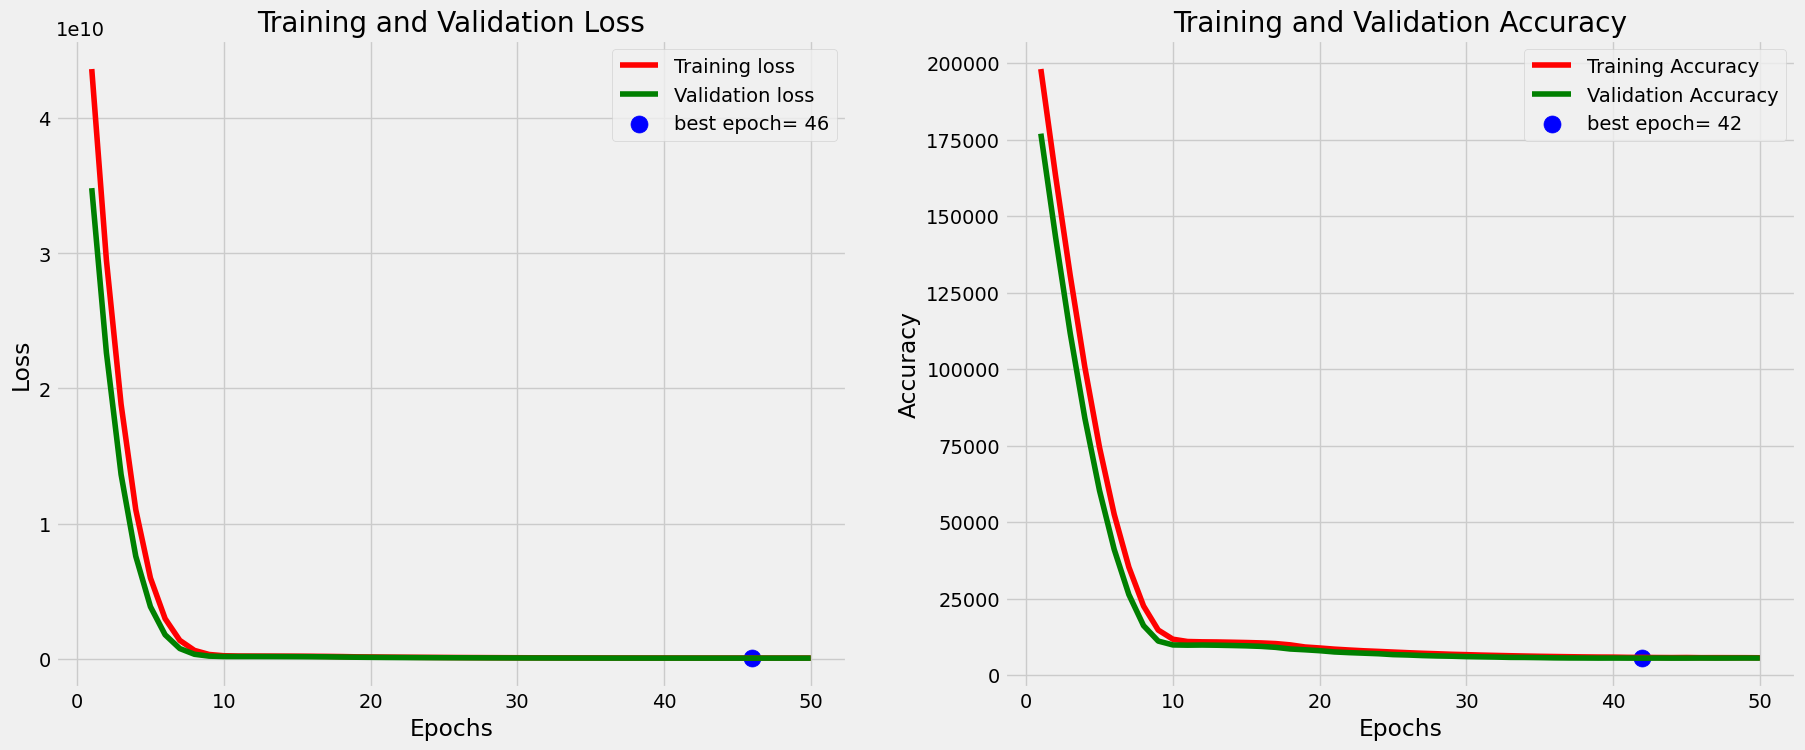

In [29]:
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show()
# kode untuk membuat visualisasi training dan validation loss dari hasil code ANN di atas
# kode untuk membuat visualisasi training dan validation accuracy dari hasil code ANN di atas

In [30]:
ann_y_pred = ann.predict(X_test)
#untuk mengevaluasi kinerja model atau untuk tujuan analisis lainnya,
#seperti menghitung metrik evaluasi tambahan atau membuat visualisasi yang membandingkan nilai prediksi dengan nilai sebenarnya (y_test)

4/4 [==============================] - 0s 6ms/step


In [32]:
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)
# code ini digunakan untuk menghitung koefisien determinasi (R-squared score) antara nilai target yang sebenarnya dan nilai prediksi yang ada di evaluasi sebelumnya

R2 score: 0.9999999808303804


In [33]:
ann.evaluate(X_test, y_test)
# kode untuk melakukan evaluasi kerja ANN, di bandingkan dengan nilai evaluasi lain nya

4/4 [==============================] - 0s 5ms/step - loss: 44839364.0000 - mean_absolute_error: 5516.3369


[44839364.0, 5516.3369140625]

In [34]:
ann.predict([[40, 70000.500, 9550,534000]])
#di sini lah ANN di gunakan untuk memprediksi, serta nilai ini 40, 70000.500, 9550,534000 menjadi nilai instance baru yang akan di prediksi

1/1 [==============================] - 0s 142ms/step


array([[51342.207]], dtype=float32)

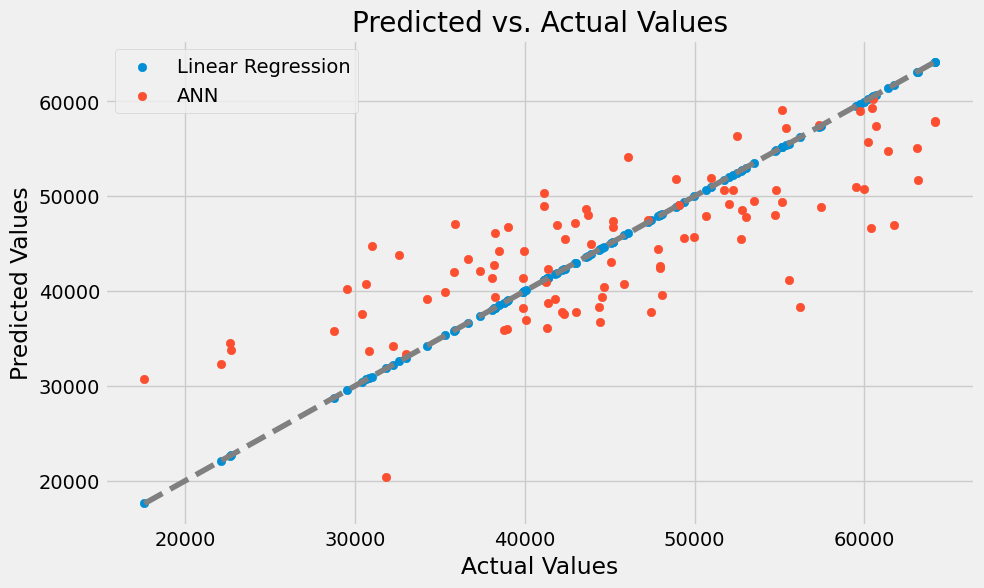

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, ann_y_pred, label='ANN')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()
#dan ini adalah code akhir unutk menampilkan hasil ANN dan prediksi